In [1]:
# 导入相关的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [12]:
# 读取数据集
dataset = pd.read_csv('data/user_data.csv', encoding='gbk')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [13]:
dataset.head()

,用户ID,性别,年龄,预计工资,是否购买
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [19]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [22]:
# 将数据集切分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=88)

print(X.shape,X_train.shape,X_test.shape)

(400, 2) (300, 2) (100, 2)


In [23]:
# 导入标准化器
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # 在训练集上进行标准化操作

print(X_train)

[[ 0.99513555 -0.82080737]
 [ 0.99513555 -1.14326741]
 [ 1.474796    0.08794365]
 [-0.25198162  0.17588729]
 [ 0.13174674  0.1172582 ]
 [ 0.22767883  2.13996207]
 [-0.63570998 -1.58298564]
 [-0.25198162 -0.1172582 ]
 [-0.63570998  0.14657274]
 [ 1.09106764 -1.2018965 ]
 [-0.25198162  0.29314549]
 [ 0.99513555  1.90544568]
 [ 0.22767883 -0.29314549]
 [ 0.89920346 -0.52766188]
 [ 0.80327137 -1.2018965 ]
 [-1.11537043 -1.55367109]
 [ 0.03581465  1.28984015]
 [ 0.41954301 -0.14657274]
 [ 0.13174674  1.90544568]
 [-0.82757416 -0.76217827]
 [ 0.32361092  0.08794365]
 [-1.59503088 -0.02931455]
 [-1.49909879 -0.17588729]
 [-1.21130252  0.32246004]
 [-0.25198162  1.14326741]
 [ 0.22767883  0.08794365]
 [ 1.09106764  0.58629098]
 [-0.25198162 -0.29314549]
 [-1.01943834 -1.11395286]
 [-0.82757416  0.41040368]
 [-0.82757416 -0.23451639]
 [-0.06011744 -1.05532376]
 [ 0.5154751   1.87613113]
 [-1.88282715 -0.73286372]
 [-0.73164207  1.3777838 ]
 [ 0.99513555  2.11064752]
 [-1.4031667  -0.61560553]
 

In [24]:
# 导入 KNeighborsClassifier 类，该类实现了 k-近邻分类器。
from sklearn.neighbors import KNeighborsClassifier
# metric="minkowski", p=2 为欧氏距离
# metric="minkowski", p=1 为曼哈顿距离
classifer=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
# 将训练集数据传入模型，初始化一些参数，但不会计算
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
 # 在测试集上进行标准化操作
X_test = sc_X.fit_transform(X_test) 
# 使用测试集进行预测
y_pred = classifer.predict(X_test)

# 将测试集的y和预测的y传入，计算出混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  4]
 [ 9 31]]


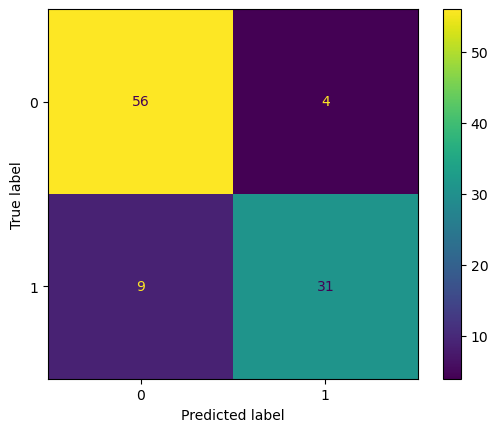

In [26]:
# 一图胜千言，使用图像展示混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=classifer.classes_)
disp.plot()
